In [3]:
import pandas as pd
casts = pd.read_csv( 'cast.csv' )

In [4]:
casts

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [5]:
casts['year'] // 10

0        201
1        198
2        201
3        201
4        201
        ... 
74996    201
74997    200
74998    201
74999    201
75000    200
Name: year, Length: 75001, dtype: int64

In [6]:
casts['year'] // 10 * 10

0        2010
1        1980
2        2010
3        2010
4        2010
         ... 
74996    2010
74997    2000
74998    2010
74999    2010
75000    2000
Name: year, Length: 75001, dtype: int64

In [7]:
decade = casts['year'] // 10 * 10

## custom field 그룹화를 해보자..

In [8]:
c_dec = casts.groupby( decade ).size()

In [9]:
c_dec

year
1910      669
1920     1121
1930     3448
1940     3997
1950     3892
1960     3743
1970     4343
1980     5554
1990     7652
2000    16199
2010    24376
2020        7
dtype: int64

In [10]:
import matplotlib.pyplot as plt

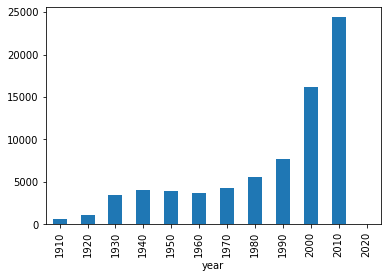

In [11]:
c_dec.plot( kind = 'bar' )
plt.show()

In [12]:
casts.groupby( [ decade, 'type' ]).size()

year  type   
1910  actor        384
      actress      285
1920  actor        710
      actress      411
1930  actor       2628
      actress      820
1940  actor       3014
      actress      983
1950  actor       2877
      actress     1015
1960  actor       2775
      actress      968
1970  actor       3044
      actress     1299
1980  actor       3565
      actress     1989
1990  actor       5108
      actress     2544
2000  actor      10368
      actress     5831
2010  actor      15523
      actress     8853
2020  actor          4
      actress        3
dtype: int64

In [13]:
casts.groupby( ['type' , decade ]).size()

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

In [14]:
dt = casts.groupby( [decade, 'type']).size()

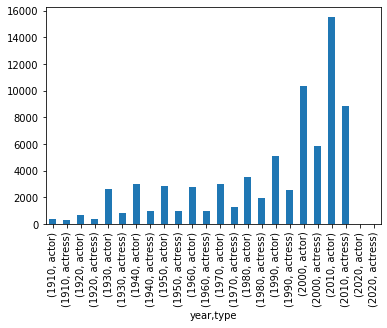

In [15]:
dt.plot(kind = 'bar')
plt.show()

In [16]:
dt2 = casts.groupby( ['type', decade]).size()

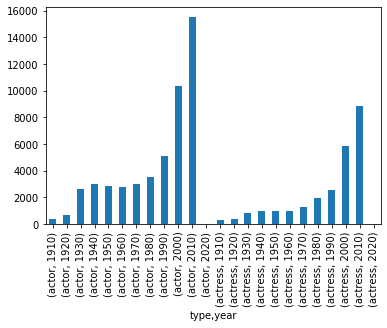

In [19]:
dt2.plot(kind='bar')
plt.show()

In [20]:
dt2

type     year
actor    1910      384
         1920      710
         1930     2628
         1940     3014
         1950     2877
         1960     2775
         1970     3044
         1980     3565
         1990     5108
         2000    10368
         2010    15523
         2020        4
actress  1910      285
         1920      411
         1930      820
         1940      983
         1950     1015
         1960      968
         1970     1299
         1980     1989
         1990     2544
         2000     5831
         2010     8853
         2020        3
dtype: int64

## multple index --> column 변경

In [21]:
dt2.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


In [22]:
type(dt2)

pandas.core.series.Series

In [23]:
dt3 = dt2.unstack()

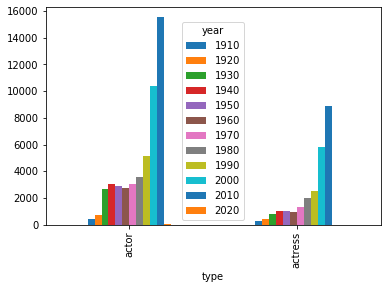

In [24]:
dt3.plot(kind='bar')
plt.show()

In [25]:
dt2.unstack(level = 0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


In [26]:
dt4 = dt2.unstack(level=0)

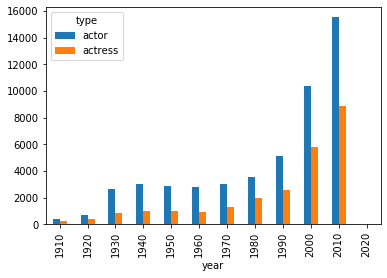

In [27]:
dt4.plot(kind='bar')
plt.show()

### 병합 (Merge)

In [28]:
release = pd.read_csv('release_dates.csv')

In [29]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


Amelia 영화 개봉 날짜를 먼저 cast에서 확인해보자...

In [30]:
casts[ casts['title'] == 'Amelia']

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [31]:
c_amelia = casts[ casts['title'] == 'Amelia']

In [32]:
release[ release['title'] == 'Amelia' ]

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12
20548,Amelia,2009,Ireland,2009-11-13
20549,Amelia,2009,Mexico,2009-11-13
20550,Amelia,2009,UK,2009-11-13
20551,Amelia,2009,Spain,2009-11-20
20552,Amelia,2009,Philippines,2009-12-02


In [33]:
c_amelia

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [34]:
c_amelia.merge( release )

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Mexico,2009-11-13
6,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,UK,2009-11-13
7,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Spain,2009-11-20
8,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Philippines,2009-12-02
9,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Italy,2009-12-23


## Aaron Abrams 함께 출연한 배우는??

In [36]:
c_aaron = casts[ casts['name'] == 'Aaron Abrams']

In [37]:
c_aaron

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0
5770,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0
5771,Code 8,2018,Aaron Abrams,actor,Actor,NaN
5772,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.0
5773,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.0
5774,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.0


In [38]:
len(c_aaron)

23

In [39]:
c_aaron.merge( casts )

,title,year,name,type,character,n
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
1,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
3,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0
4,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0
5,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0
6,Code 8,2018,Aaron Abrams,actor,Actor,NaN
7,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.0
8,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.0
9,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.0


In [40]:
c_aaron.merge( casts, on= ['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


In [41]:
c_costar = c_aaron.merge( casts, on = ['title', 'year'])

In [42]:
len(c_costar)

57

In [43]:
c_costar['name_x'] != c_costar['name_y']

0     False
1      True
2      True
3     False
4     False
5      True
6     False
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16    False
17     True
18     True
19     True
20    False
21     True
22     True
23    False
24     True
25    False
26    False
27     True
28    False
29    False
30     True
31    False
32     True
33     True
34    False
35     True
36    False
37     True
38    False
39     True
40    False
41    False
42    False
43    False
44     True
45     True
46     True
47     True
48     True
49    False
50    False
51     True
52    False
53     True
54     True
55     True
56     True
dtype: bool

In [44]:
c_costar = c_costar[ c_costar['name_x'] != c_costar['name_y'] ]

In [45]:
len(c_costar)

32

In [46]:
c_costar

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Jeremy Akerman,actor,Sheriff,19.0
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Baer Cornerman,38.0
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.0
10,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Magdalena Alexander,actress,Angry Woman,78.0
11,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0,Buffy #1,actor,Buffy 4,31.0
14,Code 8,2018,Aaron Abrams,actor,Actor,NaN,Robbie Amell,actor,Actor,NaN
15,Code 8,2018,Aaron Abrams,actor,Actor,NaN,Stephen Amell,actor,Actor,NaN
17,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.0,Joseph Adam,actor,Ceremony Reporter #1,39.0


In [47]:
c_costar[ ['title', 'year', 'name_y']]

,title,year,name_y
1,#FromJennifer,2017,Christian Ackerman
2,388 Arletta Avenue,2011,Graham Abbey
5,Amelia,2009,Jeremy Akerman
8,Cinderella Man,2005,Nick Alachiotis
9,Cinderella Man,2005,Nick Alachiotis
10,Cinderella Man,2005,Magdalena Alexander
11,Closet Monster,2015,Buffy #1
14,Code 8,2018,Robbie Amell
15,Code 8,2018,Stephen Amell
17,Firehouse Dog,2007,Joseph Adam


### Index

In [49]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [52]:
%%time
casts[ casts['title'] == 'Macbeth']

Wall time: 5.01 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [53]:
%%timeit
casts[ casts['title'] == 'Macbeth']

3.89 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
c = casts.set_index( ['title'] )

In [55]:
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [56]:
%%timeit
c.loc['Macbeth']

1.2 ms ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
cs = casts.set_index(['title']).sort_index()

In [58]:
cs.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
#DigitalLivesMatter,2016,Rashan Ali,actress,News Reporter,NaN
#FromJennifer,2017,Christian Ackerman,actor,Simon,NaN
#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
#Horror,2015,Emma Adler,actress,Georgie,1.0


In [59]:
cs.head(20)

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
#DigitalLivesMatter,2016,Rashan Ali,actress,News Reporter,NaN
#FromJennifer,2017,Christian Ackerman,actor,Simon,NaN
#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
#Horror,2015,Emma Adler,actress,Georgie,1.0
#Lucky Number,2015,Grace Abbott,actress,Internet Porn Star,31.0
#Nerealnaya lyubov,2014,Marina Aleksandrova,actress,Mira Orlova,NaN
#REALITYHIGH,2017,Suzanne Altfeld,actress,Freddie's Grandmother,NaN
#Roxy,2017,Chris Aanderson,actor,Roxy's Dad,NaN


In [60]:
cs.tail(20)

,year,name,type,character,n
title,,,,,
Zyat iz provintsii,1987,Dinmukhamet Akhimov,actor,?Taksist?,NaN
Zyat iz provintsii,1987,Kalampyr Ajsangaliyeva,actress,Luzhan,NaN
Zzikhimyeon jukneunda,2000,Jae-hwan Ahn,actor,The Teacher,3.0
bestefreunde,2014,Tina Amon Amonsen,actress,Vivian,3.0
bwoy,2016,Drew (IV) Allen,actor,Boss,NaN
eCupid,2011,Christy Alvarado,actress,Patron,33.0
eCupid,2011,Shon Abram,actor,Patron,47.0
el Ziara,2014,Manel Abdelkoui,actor,Randa,NaN
"fl 19,99",1998,Marijke Aerts,actress,Mevrouw van Veen,NaN


In [61]:
%%timeit
cs.loc['Macbeth']

124 µs ± 462 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Multiple Index

In [62]:
casts

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN


In [63]:
cm = casts.set_index( ['title', 'n']).sort_index()

In [64]:
cm.head()

year                name     type  \
title               n                                          
#1 Serial Killer    17.0   2013       Michael Alton    actor   
#DigitalLivesMatter NaN    2016          Rashan Ali  actress   
#FromJennifer       NaN    2017        Aaron Abrams    actor   
                    NaN    2017  Christian Ackerman    actor   
#Horror             1.0    2015          Emma Adler  actress   

                                   character  
title               n                         
#1 Serial Killer    17.0   Detective Roberts  
#DigitalLivesMatter NaN        News Reporter  
#FromJennifer       NaN       Ralph Sinclair  
                    NaN                Simon  
#Horror             1.0              Georgie

In [65]:
cm.loc['Macbeth']

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
18.0,1948,William Alland,actor,Second Murderer
21.0,1997,Stevie Allen,actor,Murderer
NaN,2015,Darren Adamson,actor,Soldier
NaN,1948,Robert Alan,actor,Third Murderer
NaN,2016,John Albasiny,actor,Doctor
NaN,2014,Moyo Akand?,actress,Witch


In [66]:
cm.loc['Macbeth'].loc[4:18]

,year,name,type,character
n,,,,
4.0,1916,Spottiswoode Aitken,actor,Duncan
6.0,1916,Mary Alden,actress,Lady Macduff
18.0,1948,William Alland,actor,Second Murderer


In [67]:
cm.loc['Macbeth'].iloc[4:18]

,year,name,type,character
n,,,,
NaN,2015,Darren Adamson,actor,Soldier
NaN,1948,Robert Alan,actor,Third Murderer
NaN,2016,John Albasiny,actor,Doctor
NaN,2014,Moyo Akand?,actress,Witch


In [68]:
cm

year                name     type  \
title                      n                                         
#1 Serial Killer           17.0  2013       Michael Alton    actor   
#DigitalLivesMatter        NaN   2016          Rashan Ali  actress   
#FromJennifer              NaN   2017        Aaron Abrams    actor   
                           NaN   2017  Christian Ackerman    actor   
#Horror                    1.0   2015          Emma Adler  actress   
...                               ...                 ...      ...   
w Delta z                  8.0   2007       Barbara Adair  actress   
xXx: Return of Xander Cage 34.0  2017       Wayne Ambrose    actor   
                           64.0  2017         Jeimi Abila  actress   
                           84.0  2017        Julie Abcede    actor   
xXx: State of the Union    NaN   2005       Robert Alonzo    actor   

                                         character  
title                      n                        
#1 Serial Killer           17.0  Detective Roberts  
#DigitalLivesMatter        NaN       News Reporter  
#FromJennifer              NaN      Ralph Sinclair  
                           NaN               Simon  
#Horror                    1.0             Georgie  
...                                            ...  
w Delta z                  8.0       Alice Jackson  
xXx: Return of Xander Cage 34.0      Choir Members  
                           64.0     Lazarus' Girls  
                           84.0   Catwalk Partiers  
xXx: State of the Union    NaN               Guard  

[75001 rows x 4 columns]

In [70]:
cm.reset_index( 'n', inplace=True )

In [71]:
cm.head()

,n,year,name,type,character
title,,,,,
#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter
#FromJennifer,NaN,2017,Aaron Abrams,actor,Ralph Sinclair
#FromJennifer,NaN,2017,Christian Ackerman,actor,Simon
#Horror,1.0,2015,Emma Adler,actress,Georgie


In [72]:
cm = cm.reset_index('title')

In [73]:
cm.head()

,title,n,year,name,type,character
0,#1 Serial Killer,17.0,2013,Michael Alton,actor,Detective Roberts
1,#DigitalLivesMatter,NaN,2016,Rashan Ali,actress,News Reporter
2,#FromJennifer,NaN,2017,Aaron Abrams,actor,Ralph Sinclair
3,#FromJennifer,NaN,2017,Christian Ackerman,actor,Simon
4,#Horror,1.0,2015,Emma Adler,actress,Georgie


## 파일 읽기

In [75]:
df = pd.read_csv('ex1.csv')

In [76]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [77]:
df2 = pd.read_table('ex1.csv')

In [78]:
df2

,"a,b,c,d,message"
0,"1,2,3,4,hello"
1,"5,6,7,8,world"
2,"9,10,11,12,foo"


In [79]:
df3 = pd.read_table('ex1.csv', sep = ',')

In [80]:
df3

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [81]:
df = pd.read_csv('ex2.csv')

In [82]:
df

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [83]:
df2 = pd.read_csv('ex2.csv', header=None )

In [84]:
df2

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [85]:
df2.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [86]:
df2.columns = ["one", "two", 'three', 'four', 'five']

In [87]:
df2

,one,two,three,four,five
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [88]:
df2.columns[2] = 'ten'

TypeError: Index does not support mutable operations

In [89]:
df3 = pd.read_csv('ex2.csv', names = ['a','b','c','d','msg'])

In [90]:
df3

,a,b,c,d,msg
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [91]:
df3.set_index('msg')

,a,b,c,d
msg,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [92]:
df4 = pd.read_csv('ex2.csv', names = ['a','b','c','d','msg'], index_col = 'msg')

In [93]:
df4

,a,b,c,d
msg,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [94]:
df = pd.read_csv('ex4.csv')

In [95]:
df

,,,,#설명하는 글들.....
a,b,c,d,message
#데이터와 관계없는 텍스트...,NaN,NaN,NaN,NaN
fakjlfdjkalfklj,NaN,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [96]:
df = pd.read_csv('ex4.csv', skiprows=[0, 2, 3])

In [97]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [98]:
df = pd.read_csv('ex4.csv', skiprows=[0, 2, 3], index_col='message')

In [99]:
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [100]:
df = pd.read_csv('csv_mindex.csv')

In [101]:
df

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [102]:
df = pd.read_csv('csv_mindex.csv' , index_col= ['key1', 'key2'])

In [103]:
df

value1  value2
key1 key2                
one   a         1       2
      b         3       4
      c         5       6
      d         7       8
two   a         9      10
      b        11      12
      c        13      14
      d        15      16

In [104]:
df = pd.read_csv('ex1.csv')

In [105]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [106]:
df.to_csv( 'new_ex1.csv' )

In [107]:
df2 = pd.read_csv('new_ex1.csv')

In [108]:
df2

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [109]:
df.to_csv('new_ex1_without_index.csv', index=False)

In [110]:
df2 = pd.read_csv('new_ex1_without_index.csv')

In [111]:
df2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [112]:
df.to_csv('ex1_wo_index_wo_header.csv', index=False, header=False)

In [113]:
df.to_csv('ex1_tab.csv', sep = '\t')

In [114]:
df.to_excel('ex1.xlsx')

daegu_20210712.csv 수정 없이 read_csv() 읽어 와서
1. 최고온도, 최저온도를 구해보고
2. 최고온도 Top 10, 최저 Top10 을 pandas로 구해 보시오.

참고) encoding = 'ms949' 해준다.  
Series 최고값 : max()  
Series 최저값 : min()  
Series 최고값 위치 : idxmax()  
Series 최저값 위치 : idxmin()  

In [116]:
dg_temp = pd.read_csv('daegu_20210712.csv', encoding='ms949')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 5


In [117]:
dg_temp = pd.read_csv('daegu_20210712.csv', encoding='ms949', skiprows=7)

In [118]:
dg_temp.shape

(3683, 5)

In [120]:
dg_temp.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2011-06-12,143,24.6,20.8,29.7
1,2011-06-13,143,23.7,19.6,29.4
2,2011-06-14,143,24.1,19.2,29.4
3,2011-06-15,143,23.4,19.7,27.8
4,2011-06-16,143,22.5,19.0,27.7


In [121]:
dg_temp[ '최고기온(℃)' ]

0       29.7
1       29.4
2       29.4
3       27.8
4       27.7
        ... 
3678    26.2
3679    29.6
3680    29.1
3681    32.6
3682    33.8
Name: 최고기온(℃), Length: 3683, dtype: float64

In [122]:
dg_temp[ '최고기온(℃)' ].max()

39.2

In [123]:
dg_temp[ '최저기온(℃)' ].min()

-13.9

In [124]:
dg_temp[ '최고기온(℃)' ].idxmax()

2602

In [125]:
dg_temp.iloc[2602]

날짜         2018-07-27
지점                143
평균기온(℃)          32.4
최저기온(℃)          28.6
최고기온(℃)          39.2
Name: 2602, dtype: object

In [126]:
dg_temp.iloc[ dg_temp[ '최저기온(℃)' ].idxmin() ]

날짜         2018-01-27
지점                143
평균기온(℃)          -5.6
최저기온(℃)         -13.9
최고기온(℃)           2.8
Name: 2421, dtype: object

In [128]:
dg_temp.iloc[ dg_temp[ '최저기온(℃)' ].idxmin() ]['날짜' ]

'2018-01-27'

In [129]:
dg_temp.sort_values('최고기온(℃)', ascending=False  ).head(10)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
2602,2018-07-27,143,32.4,28.6,39.2
2610,2018-08-04,143,32.3,27.2,38.7
2599,2018-07-24,143,32.2,26.7,38.6
2595,2018-07-20,143,31.5,25.4,38.5
2232,2017-07-22,143,28.8,22.7,38.4
1516,2015-08-06,143,31.3,25.6,38.3
1889,2016-08-13,143,32.4,26.1,38.1
2601,2018-07-26,143,33.1,27.9,38.0
2598,2018-07-23,143,32.2,27.4,38.0
792,2013-08-12,143,32.5,27.6,37.9


In [130]:
dg_temp.sort_values('최고기온(℃)', ascending=False  ).head(10)[ ['날짜', '최고기온(℃)']]

,날짜,최고기온(℃)
2602,2018-07-27,39.2
2610,2018-08-04,38.7
2599,2018-07-24,38.6
2595,2018-07-20,38.5
2232,2017-07-22,38.4
1516,2015-08-06,38.3
1889,2016-08-13,38.1
2601,2018-07-26,38.0
2598,2018-07-23,38.0
792,2013-08-12,37.9


In [131]:
dg_temp.sort_values('최저기온(℃)', ascending=True  ).head(10)[ ['날짜', '최저기온(℃)']]

,날짜,최저기온(℃)
2421,2018-01-27,-13.9
3498,2021-01-08,-13.6
2420,2018-01-26,-13.0
1687,2016-01-24,-13.0
607,2013-02-08,-12.5
3497,2021-01-07,-12.4
2419,2018-01-25,-12.4
235,2012-02-02,-12.4
2418,2018-01-24,-12.3
572,2013-01-04,-11.6


### 새로운 행 추가

In [132]:
df = pd.read_csv('ex1.csv')

In [133]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [134]:
df['e'] = 10

In [135]:
df

,a,b,c,d,message,e
0,1,2,3,4,hello,10
1,5,6,7,8,world,10
2,9,10,11,12,foo,10


In [136]:
del df['e']

In [137]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [138]:
newline = [1,2,3,4, 'boo']

In [139]:
df.append(newline)

,a,b,c,d,message,0
0,1.0,2.0,3.0,4.0,hello,NaN
1,5.0,6.0,7.0,8.0,world,NaN
2,9.0,10.0,11.0,12.0,foo,NaN
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,boo


In [140]:
newline2 = { 'a':1, 'b':2, 'c':3, 'd':4, 'message':'boo'}

In [141]:
df.append(newline2)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [142]:
df.append(newline2, ignore_index=True)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
3,1,2,3,4,boo


In [143]:
pd.Series(newline)

0      1
1      2
2      3
3      4
4    boo
dtype: object

In [144]:
df.append( pd.Series(newline) )

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [147]:
df.append( pd.Series(newline, index=['a','b','c','d', 'message']) , ignore_index=True)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
3,1,2,3,4,boo


In [149]:
df.append( pd.Series(newline, index=['a','b','c','d', 'message'], name='x') )

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
x,1,2,3,4,boo


In [150]:
newline

[1, 2, 3, 4, 'boo']

In [151]:
df.columns

Index(['a', 'b', 'c', 'd', 'message'], dtype='object')

In [152]:
pd.Series(newline, index = df.columns)

a            1
b            2
c            3
d            4
message    boo
dtype: object

### 병합 (Merge)

In [154]:
df1= pd.DataFrame( {'key' : ['b','b','a','c','a','a','b'],
                    'data1' : range(7)
                   })
df2= pd.DataFrame( {'key' : ['a','b','d', 'b'],
                   'data2' : range(4)})

In [155]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [156]:
df2

,key,data2
0,a,0
1,b,1
2,d,2
3,b,3


In [157]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [158]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [159]:
df1= pd.DataFrame( {'key1' : ['b','b','a','c','a','a','b'],
                    'data1' : range(7)
                   })
df2= pd.DataFrame( {'key2' : ['a','b','d', 'b'],
                   'data2' : range(4)})

In [160]:
pd.merge(df1, df2)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [161]:
pd.merge(df1, df2, left_on = 'key1', right_on='key2') #how inner join (default), 공통만 취함.

,key1,data1,key2,data2
0,b,0,b,1
1,b,0,b,3
2,b,1,b,1
3,b,1,b,3
4,b,6,b,1
5,b,6,b,3
6,a,2,a,0
7,a,4,a,0
8,a,5,a,0


In [162]:
pd.merge(df1, df2, left_on = 'key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,0,b,1.0
1,b,0,b,3.0
2,b,1,b,1.0
3,b,1,b,3.0
4,a,2,a,0.0
5,c,3,NaN,NaN
6,a,4,a,0.0
7,a,5,a,0.0
8,b,6,b,1.0
9,b,6,b,3.0


In [163]:
pd.merge(df1, df2, left_on = 'key1', right_on='key2', how='right')

,key1,data1,key2,data2
0,b,0.0,b,1
1,b,1.0,b,1
2,b,6.0,b,1
3,b,0.0,b,3
4,b,1.0,b,3
5,b,6.0,b,3
6,a,2.0,a,0
7,a,4.0,a,0
8,a,5.0,a,0
9,NaN,NaN,d,2


In [164]:
pd.merge(df1, df2, left_on = 'key1', right_on='key2', how='outer')

,key1,data1,key2,data2
0,b,0.0,b,1.0
1,b,0.0,b,3.0
2,b,1.0,b,1.0
3,b,1.0,b,3.0
4,b,6.0,b,1.0
5,b,6.0,b,3.0
6,a,2.0,a,0.0
7,a,4.0,a,0.0
8,a,5.0,a,0.0
9,c,3.0,NaN,NaN


## 데이터 결합 (concatenation)

In [165]:
s1 = pd.Series([0, 1], index=['a','b'])
s2 = pd.Series([2,1,3], index=['c','d','e'])
s3 = pd.Series([4,7], index=['a','e'])

In [166]:
s1

a    0
b    1
dtype: int64

In [167]:
s2

c    2
d    1
e    3
dtype: int64

In [168]:
s3

a    4
e    7
dtype: int64

In [169]:
pd.concat( [s1, s2])

a    0
b    1
c    2
d    1
e    3
dtype: int64

In [170]:
pd.concat( [s1, s2], axis=1)

,0,1
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,1.0
e,NaN,3.0


In [171]:
df1

,key1,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [172]:
df2

,key2,data2
0,a,0
1,b,1
2,d,2
3,b,3


In [174]:
pd.concat([df1, df2])

,key1,data1,key2,data2
0,b,0.0,NaN,NaN
1,b,1.0,NaN,NaN
2,a,2.0,NaN,NaN
3,c,3.0,NaN,NaN
4,a,4.0,NaN,NaN
5,a,5.0,NaN,NaN
6,b,6.0,NaN,NaN
0,NaN,NaN,a,0.0
1,NaN,NaN,b,1.0
2,NaN,NaN,d,2.0


In [175]:
pd.concat([df1, df2] , axis=1)

,key1,data1,key2,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,b,3.0
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


## 중복 데이터를 삭제해보자!

In [176]:
df = pd.DataFrame( {'k1': ['one']*3 + ['two']*4,
                    'k2' : [1,1,2,3,3,4,4]   
})

In [177]:
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [178]:
df.duplicated() #중복된 값 확인

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [179]:
df[ df.duplicated() ]

,k1,k2
1,one,1
4,two,3
6,two,4


In [182]:
df.drop_duplicates(keep=False)

,k1,k2
2,one,2


In [183]:
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [184]:
df.drop_duplicates( ['k1'] ) #특정 열의 중복을 삭제

,k1,k2
0,one,1
3,two,3


In [185]:
df.drop_duplicates( ['k1'], keep='last' ) #특정 열의 중복을 삭제

,k1,k2
2,one,2
6,two,4


## 값을 변경 (replace)

In [186]:
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [187]:
df['k1'][3]='투'

C:\Users\IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
df

,k1,k2
0,one,1
1,one,1
2,one,2
3,투,3
4,two,3
5,two,4
6,two,4


In [189]:
df.replace('one', '일')

,k1,k2
0,일,1
1,일,1
2,일,2
3,투,3
4,two,3
5,two,4
6,two,4


# Time Series (시계열..)

## Timestamp

In [190]:
rng = pd.date_range('2021-07-14 16:30', periods=10)

In [191]:
rng

DatetimeIndex(['2021-07-14 16:30:00', '2021-07-15 16:30:00',
               '2021-07-16 16:30:00', '2021-07-17 16:30:00',
               '2021-07-18 16:30:00', '2021-07-19 16:30:00',
               '2021-07-20 16:30:00', '2021-07-21 16:30:00',
               '2021-07-22 16:30:00', '2021-07-23 16:30:00'],
              dtype='datetime64[ns]', freq='D')

In [192]:
rng2 = pd.date_range('2021-07-14 16:30', periods=10, freq='B')

In [193]:
rng2

DatetimeIndex(['2021-07-14 16:30:00', '2021-07-15 16:30:00',
               '2021-07-16 16:30:00', '2021-07-19 16:30:00',
               '2021-07-20 16:30:00', '2021-07-21 16:30:00',
               '2021-07-22 16:30:00', '2021-07-23 16:30:00',
               '2021-07-26 16:30:00', '2021-07-27 16:30:00'],
              dtype='datetime64[ns]', freq='B')

In [194]:
rng2 = pd.date_range('2021-07-14 16:30', periods=10, freq='M')

In [195]:
rng2

DatetimeIndex(['2021-07-31 16:30:00', '2021-08-31 16:30:00',
               '2021-09-30 16:30:00', '2021-10-31 16:30:00',
               '2021-11-30 16:30:00', '2021-12-31 16:30:00',
               '2022-01-31 16:30:00', '2022-02-28 16:30:00',
               '2022-03-31 16:30:00', '2022-04-30 16:30:00'],
              dtype='datetime64[ns]', freq='M')

In [196]:
rng2 = pd.date_range('2021-07-14 16:30', periods=10, freq='MS')

In [197]:
rng2

DatetimeIndex(['2021-08-01 16:30:00', '2021-09-01 16:30:00',
               '2021-10-01 16:30:00', '2021-11-01 16:30:00',
               '2021-12-01 16:30:00', '2022-01-01 16:30:00',
               '2022-02-01 16:30:00', '2022-03-01 16:30:00',
               '2022-04-01 16:30:00', '2022-05-01 16:30:00'],
              dtype='datetime64[ns]', freq='MS')

In [198]:
rng2 = pd.date_range('2021-07-14 16:30', periods=10, freq='S')

In [199]:
rng2

DatetimeIndex(['2021-07-14 16:30:00', '2021-07-14 16:30:01',
               '2021-07-14 16:30:02', '2021-07-14 16:30:03',
               '2021-07-14 16:30:04', '2021-07-14 16:30:05',
               '2021-07-14 16:30:06', '2021-07-14 16:30:07',
               '2021-07-14 16:30:08', '2021-07-14 16:30:09'],
              dtype='datetime64[ns]', freq='S')

In [203]:
rng2 = pd.date_range('2021-07-14 16:30', periods=10, freq='5S', tz='Asia/Seoul')

In [204]:
rng2

DatetimeIndex(['2021-07-14 16:30:00+09:00', '2021-07-14 16:30:05+09:00',
               '2021-07-14 16:30:10+09:00', '2021-07-14 16:30:15+09:00',
               '2021-07-14 16:30:20+09:00', '2021-07-14 16:30:25+09:00',
               '2021-07-14 16:30:30+09:00', '2021-07-14 16:30:35+09:00',
               '2021-07-14 16:30:40+09:00', '2021-07-14 16:30:45+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='5S')

In [205]:
rng2.tz_convert('Australia/Sydney')

DatetimeIndex(['2021-07-14 17:30:00+10:00', '2021-07-14 17:30:05+10:00',
               '2021-07-14 17:30:10+10:00', '2021-07-14 17:30:15+10:00',
               '2021-07-14 17:30:20+10:00', '2021-07-14 17:30:25+10:00',
               '2021-07-14 17:30:30+10:00', '2021-07-14 17:30:35+10:00',
               '2021-07-14 17:30:40+10:00', '2021-07-14 17:30:45+10:00'],
              dtype='datetime64[ns, Australia/Sydney]', freq='5S')

### 문자열 --> 날짜 타입으로 변경

In [207]:
dd = ['07/07/2015', '08/12/2019', '12/04/2021']

In [208]:
dd

['07/07/2015', '08/12/2019', '12/04/2021']

In [210]:
type(dd[0])

str

### 날짜 표기법
미국 : 월/일/년   May 5th 2021
유럽 : 일/월/년



In [213]:
pd.to_datetime( dd ) #미국식

DatetimeIndex(['2015-07-07', '2019-08-12', '2021-12-04'], dtype='datetime64[ns]', freq=None)

In [214]:
pd.to_datetime( dd , dayfirst=True)

DatetimeIndex(['2015-07-07', '2019-12-08', '2021-04-12'], dtype='datetime64[ns]', freq=None)

### dataframe Index를 타임스탬프로 만들어보자..

In [215]:
dates = pd.date_range('2021-01-01', '2021-07-14', freq='M')

In [218]:
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', freq='M')

In [219]:
atemp = pd.Series( [35.3, 28, 29.4, 24.5, 32.6, 26.3] , index = dates)

In [220]:
atemp

2021-01-31    35.3
2021-02-28    28.0
2021-03-31    29.4
2021-04-30    24.5
2021-05-31    32.6
2021-06-30    26.3
Freq: M, dtype: float64

In [221]:
stemp = pd.Series( [34.2, 28.6, 30, 26, 33.4, 25.6], index=dates)

In [222]:
stemp

2021-01-31    34.2
2021-02-28    28.6
2021-03-31    30.0
2021-04-30    26.0
2021-05-31    33.4
2021-06-30    25.6
Freq: M, dtype: float64

In [223]:
temps = pd.DataFrame({ '대구' : atemp, '경산' : stemp})

In [224]:
temps

,대구,경산
2021-01-31,35.3,34.2
2021-02-28,28.0,28.6
2021-03-31,29.4,30.0
2021-04-30,24.5,26.0
2021-05-31,32.6,33.4
2021-06-30,26.3,25.6


In [225]:
temps['온도차'] = temps['대구'] - temps['경산']

In [226]:
temps

,대구,경산,온도차
2021-01-31,35.3,34.2,1.1
2021-02-28,28.0,28.6,-0.6
2021-03-31,29.4,30.0,-0.6
2021-04-30,24.5,26.0,-1.5
2021-05-31,32.6,33.4,-0.8
2021-06-30,26.3,25.6,0.7


In [227]:
temps.loc['2021-03-31']

대구     29.4
경산     30.0
온도차    -0.6
Name: 2021-03-31 00:00:00, dtype: float64

In [228]:
temps.loc['03/31/2021']

대구     29.4
경산     30.0
온도차    -0.6
Name: 2021-03-31 00:00:00, dtype: float64

In [229]:
df = pd.read_csv('stocks.csv', index_col=0)

In [230]:
df

,date,AA,GE,IBM,MSFT
0,1990-02-01 00:00:00,4.98,2.87,16.79,0.51
1,1990-02-02 00:00:00,5.04,2.87,16.89,0.51
2,1990-02-05 00:00:00,5.07,2.87,17.32,0.51
3,1990-02-06 00:00:00,5.01,2.88,17.56,0.51
4,1990-02-07 00:00:00,5.04,2.91,17.93,0.51
...,...,...,...,...,...
5467,2011-10-10 00:00:00,10.09,16.14,186.62,26.94
5468,2011-10-11 00:00:00,10.30,16.14,185.00,27.00
5469,2011-10-12 00:00:00,10.05,16.40,186.12,26.96
5470,2011-10-13 00:00:00,10.10,16.22,186.82,27.18


In [231]:
type( df.date[0] )

str

In [232]:
type( df['date'][0])

str

In [233]:
df = pd.read_csv('stocks.csv', index_col='date')

In [234]:
df

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-01 00:00:00,0,4.98,2.87,16.79,0.51
1990-02-02 00:00:00,1,5.04,2.87,16.89,0.51
1990-02-05 00:00:00,2,5.07,2.87,17.32,0.51
1990-02-06 00:00:00,3,5.01,2.88,17.56,0.51
1990-02-07 00:00:00,4,5.04,2.91,17.93,0.51
...,...,...,...,...,...
2011-10-10 00:00:00,5467,10.09,16.14,186.62,26.94
2011-10-11 00:00:00,5468,10.30,16.14,185.00,27.00
2011-10-12 00:00:00,5469,10.05,16.40,186.12,26.96


In [236]:
df = pd.read_csv('stocks.csv', index_col='date', parse_dates=['date'])

In [237]:
df

,Unnamed: 0,AA,GE,IBM,MSFT
date,,,,,
1990-02-01,0,4.98,2.87,16.79,0.51
1990-02-02,1,5.04,2.87,16.89,0.51
1990-02-05,2,5.07,2.87,17.32,0.51
1990-02-06,3,5.01,2.88,17.56,0.51
1990-02-07,4,5.04,2.91,17.93,0.51
...,...,...,...,...,...
2011-10-10,5467,10.09,16.14,186.62,26.94
2011-10-11,5468,10.30,16.14,185.00,27.00
2011-10-12,5469,10.05,16.40,186.12,26.96


In [238]:
del df['Unnamed: 0']

In [239]:
df

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51
...,...,...,...,...
2011-10-10,10.09,16.14,186.62,26.94
2011-10-11,10.30,16.14,185.00,27.00
2011-10-12,10.05,16.40,186.12,26.96


In [240]:
df.loc['02/07/1990']

AA       5.04
GE       2.91
IBM     17.93
MSFT     0.51
Name: 1990-02-07 00:00:00, dtype: float64

In [241]:
df.loc['1990 Feb. 7']

AA       5.04
GE       2.91
IBM     17.93
MSFT     0.51
Name: 1990-02-07 00:00:00, dtype: float64

In [242]:
df.loc['1990-02-01':'1990-Feb-05']

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51


In [243]:
df.loc['1990-02']

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51
1990-02-08,5.04,2.92,17.86,0.51
1990-02-09,5.06,2.94,17.82,0.52
1990-02-12,4.96,2.89,17.58,0.52
1990-02-13,4.91,2.88,17.95,0.52


In [244]:
df.loc['1990']

,AA,GE,IBM,MSFT
date,,,,
1990-02-01,4.98,2.87,16.79,0.51
1990-02-02,5.04,2.87,16.89,0.51
1990-02-05,5.07,2.87,17.32,0.51
1990-02-06,5.01,2.88,17.56,0.51
1990-02-07,5.04,2.91,17.93,0.51
...,...,...,...,...
1990-12-24,4.86,2.76,20.47,0.82
1990-12-26,4.87,2.75,20.41,0.82
1990-12-27,4.80,2.74,20.43,0.82
